In [1]:
# import the necessary packages
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [2]:
dirpath=os.getcwd()
imagePath = "samples\seinfeld.jpg"
image = cv2.imread(imagePath)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
#plt.imshow(image)

In [3]:
caspath = dirpath+'\.venv\Lib\site-packages\cv2\data\haarcascade_frontalface_default.xml'
faceCascade = cv2.CascadeClassifier(caspath)

In [4]:
Minimumsize = 15
faces = faceCascade.detectMultiScale(
    image,
    scaleFactor=1.2,
    minNeighbors=4,
    minSize=(Minimumsize, Minimumsize)
    #flags = cv2.CV_HAAR_SCALE_IMAGE
)
print("Found {0} faces!".format(len(faces)))

Found 4 faces!


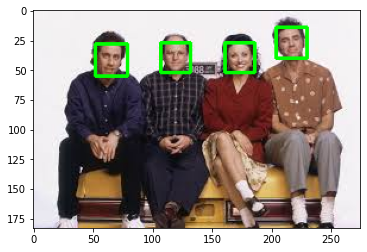

In [5]:
# Draw a rectangle around the faces
image_result = image.copy()
for (x, y, w, h) in faces:
    cv2.rectangle(image_result, (x, y), (x+w, y+h), (0, 255, 0), 2)
plt.imshow(image_result)

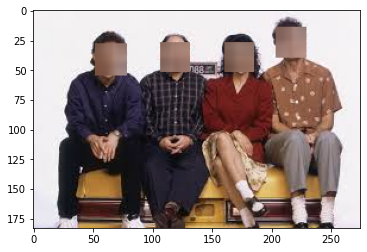

In [6]:
blur_image = image.copy()
for (x, y, w, h) in faces:
    sub_face = blur_image[y:y+h, x:x+w]
    sub_face=cv2.GaussianBlur(sub_face,(23,23),Minimumsize)
    blur_image[y:y+sub_face.shape[0], x:x+sub_face.shape[1]] = sub_face
    plt.imshow(blur_image)